In [173]:
from sklearn.datasets import make_classification
import numpy as np

X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                            n_clusters_per_class=1, random_state=41,hypercube=False, class_sep=20)

In [174]:
X.shape

(100, 2)

In [175]:
y.shape

(100,)

In [176]:
import matplotlib.pyplot as plt

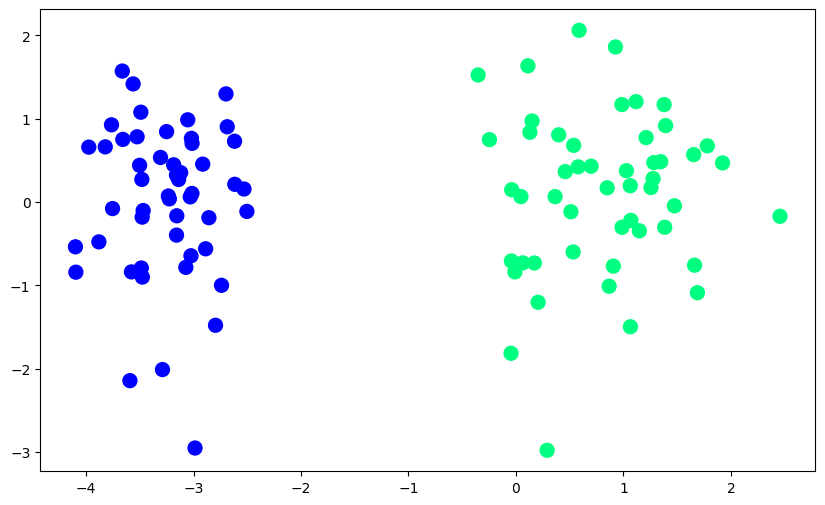

In [177]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y,cmap='winter',s=100) 

In [178]:
# Apply logistic regression here

from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(penalty=None,solver='sag')      # means no any 'regularization' here.
lor.fit(X,y)

C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [179]:
print(lor.intercept_)
print(lor.coef_)

[5.76925602]
[[4.7949986  0.20873129]]


In [180]:
# now, we find slope and intercept value 

m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

print("value of m1:", m1)
print("value of b1:", b1)

value of m1: -22.972111683507585
value of b1: [-27.63963134]


In [181]:
x_input = np.linspace(-3,3,100)
y_input = (m1*x_input) + b1

In [191]:
# Now, we write our 'Gradient_Descent' code here
# we use "Batch_gradient_method" for this

def gd(X,y):

    X = np.insert(X,0,1,axis=1)       # we add one extra column to matrix 'X' each values=1 at (index=0). 
    weights = np.ones(X.shape[1])     # Initializes all weights to 1. (It's a matrix 'w'  ---> look in 'NOTES'.) 
    lr = 0.5                          # you can take any values of 'lr'

     # now, Apply our formula here, for finding the value of weights('w') or coefficients 
     # i.e.,  w = w + lr*((Yi - Y_hat)*X)/m ; where  'm' --> no. of rows    
      
    
    for i in range(5000):     #  you can take any value 

        y_hat = sigmoid(np.dot(X,weights))
        
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])    # "X.shape[0]" gives the value of 'm' here   

    return weights[0], weights[1:]      # "ALWAYS  WRITE  IT  IN  THIS  ORDER."

In [183]:
def sigmoid(z):

    return 1/(1 + np.exp(-z)) 

In [184]:
intercept_,coef_ = gd(X,y)             # "ALWAYS  WRITE  IT  IN  THIS  ORDER."

In [185]:
# now, find the value of 'slope' and 'intercept' from this

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

print("value of m:", m)
print("value of b:", b)

value of m: -22.84586207917221
value of b: -27.53903541191917


In [186]:
x_input1 = np.linspace(-3,3,100)
y_input1 = (m*x_input1) + b

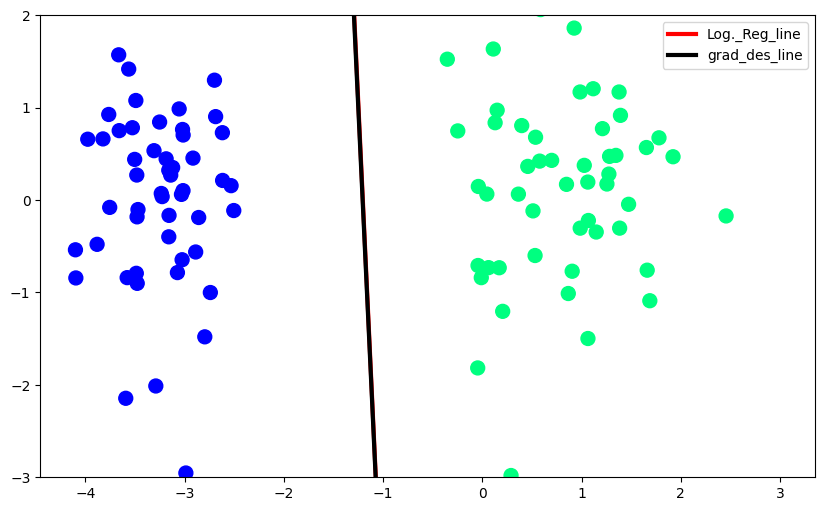

In [187]:
# Now, plot the line using 'slope' and 'intercept' term

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Log._Reg_line')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='grad_des_line')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()

In [190]:
# So we can see, On (epoch=2000) they are very close to each other.
# And, on increasing 'no. of epochs',it started overlapping to each other.
# And finaly, On (epoch=5000) they overlapped to each other.